In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from a CSV file into a pandas DataFrame
data=pd.read_csv("/content/Obesity.csv")

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.shape

(2111, 17)

In [15]:
# Generate summary statistics for the numerical columns in the dataset
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
# Display a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [6]:
# Print the unique values for each columns
for i in data.columns:
  print(f"{i} : {data[i].unique()}")

Gender : ['Female' 'Male' nan]
Age : [21.       23.       27.       ... 22.524036 24.361936 23.664709]
Height : [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
Weight : [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
family_history_with_overweight : ['yes' 'no' nan]
FAVC : ['no' 'yes']
FCVC : [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199
 2.943749 2.33998

In [8]:
# Calculate the total number of missing (NaN) values in each column of the dataset
data.isna().sum()

,0
Gender,9
Age,0
Height,10
Weight,0
family_history_with_overweight,6
FAVC,0
FCVC,0
NCP,0
CAEC,9
SMOKE,0


Gender,height,family_history_with_overweight,CAEC,SCC,MTRANS columns contain missing values

In [9]:
# Calculate the total percentage of missing (NaN) values in each column of the dataset
data.isnull().mean() * 100

,0
Gender,0.426338
Age,0.000000
Height,0.473709
Weight,0.000000
family_history_with_overweight,0.284225
FAVC,0.000000
FCVC,0.000000
NCP,0.000000
CAEC,0.426338
SMOKE,0.000000


In [10]:
# extract categorical columns to the cat_cols variable
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

In [11]:
cat_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [12]:
#Fill the categorical missing values with mode
for i in ['Gender','family_history_with_overweight','CAEC','SCC','MTRANS']:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [13]:
data.isna().sum()

,0
Gender,0
Age,0
Height,10
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


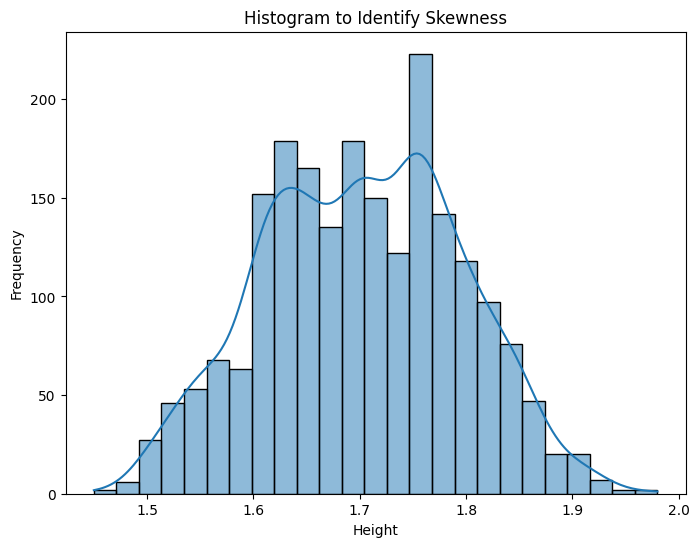

In [14]:
#distribution of height to find skewness
plt.figure(figsize=(8, 6))
sns.histplot(data['Height'], kde=True)  # kde=True adds the density plot for visualization
plt.title('Histogram to Identify Skewness')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [16]:
# this is not skewed
#handled with mean
data['Height'].fillna(data['Height'].mean(), inplace=True)

In [17]:
data.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


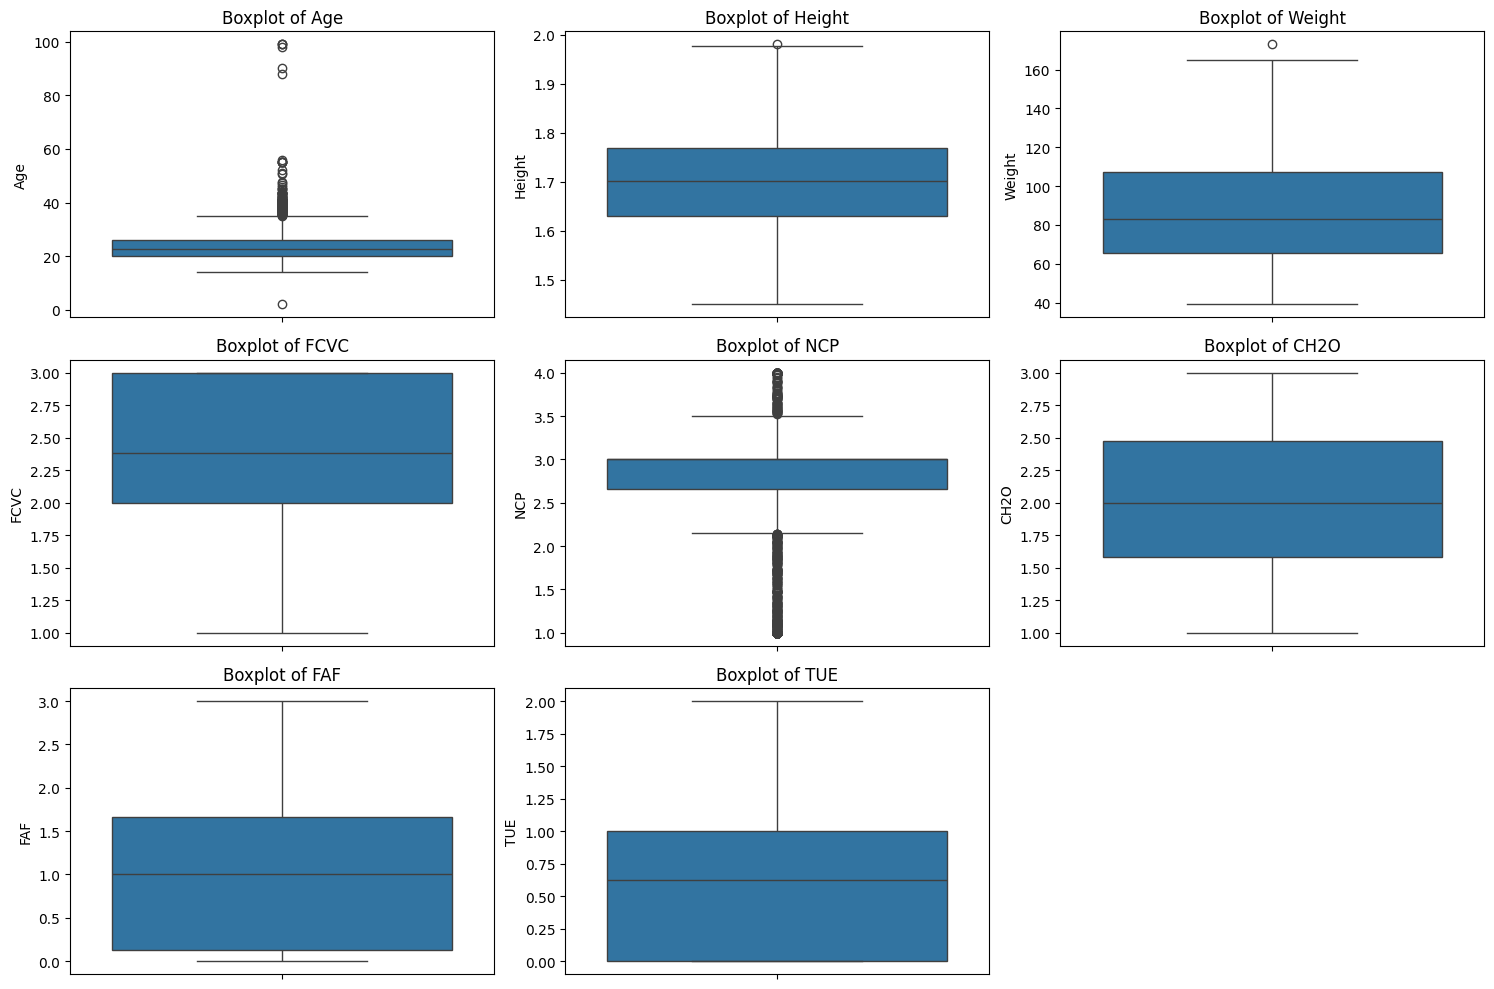

In [18]:
#outlier detection
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns

# Create boxplots for each numeric column
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # Adjusting for layout
    sns.boxplot(data=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [23]:
#outlier detection using IQR method
for i in numeric_columns:
  q1=data[i].quantile(0.25)
  q2=data[i].quantile(0.50)
  q3=data[i].quantile(0.75)
  iqr = q3 - q1
  low = q1 - 1.5 * iqr
  up = q3 + 1.5 * iqr
  outliers = data[(data[i] < low) | (data[i] > up)]
  outlier_values = outliers[[i]]
  unique_outlier_values = outliers[i].unique()
  print(f'{outlier_values} \n {unique_outlier_values}')

            Age
13    41.000000
21    52.000000
33    39.000000
92    55.000000
104   38.000000
...         ...
1740  37.765356
1775  37.207082
1776  38.108940
1777  38.644441
1778  38.112989

[174 rows x 1 columns] 
 [41.       52.       39.       55.       38.       99.       44.
 36.        2.       40.       88.       45.       90.       98.
 51.       56.       37.       41.823567 35.125401 36.769646 35.194089
 37.218161 42.24475  37.455752 38.943282 35.483601 38.939448 39.965474
 38.692265 38.952866 36.631456 39.214514 38.825189 35.217173 55.24625
 42.189023 38.464538 37.496175 50.832559 36.310292 43.238402 55.137881
 38.378056 39.170029 46.491859 38.384177 37.205173 37.492444 35.456326
 39.392569 37.275298 55.022494 41.743333 38.097395 37.642177 47.7061
 35.719457 35.432059 39.585811 45.821267 39.759575 43.604901 42.31607
 37.356288 40.821515 37.955371 40.317787 35.389491 40.951591 39.135634
 37.832949 37.631769 37.524551 43.510672 36.726617 38.297259 42.337283
 47.283374 38.148

In [26]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [27]:
#find value count of each category in each column
for i in cat_cols:
  print(f"{i} : {data[i].value_counts()}")

Gender : Gender
Male      1070
Female    1041
Name: count, dtype: int64
family_history_with_overweight : family_history_with_overweight
yes    1728
no      383
Name: count, dtype: int64
FAVC : FAVC
yes    1866
no      245
Name: count, dtype: int64
CAEC : CAEC
Sometimes     1767
Frequently     241
Always          53
no              50
Name: count, dtype: int64
SMOKE : SMOKE
no     2067
yes      44
Name: count, dtype: int64
SCC : SCC
no     2015
yes      96
Name: count, dtype: int64
CALC : CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS : MTRANS
Public_Transportation    1583
Automobile                455
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad : NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight   

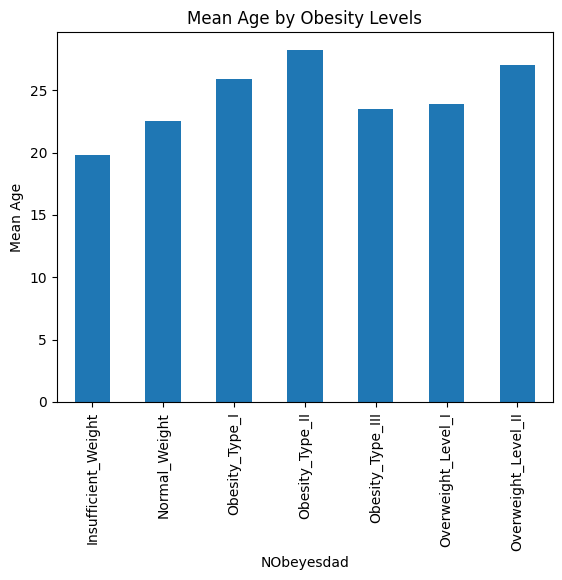

In [31]:
#relationship between age and obesity
data.groupby('NObeyesdad')['Age'].mean().plot(kind='bar')
plt.title('Mean Age by Obesity Levels')
plt.ylabel('Mean Age')
plt.show()



*   Obesity increases with age: As people get older, they are more likely to be in higher obesity categories
*   Younger individuals tend to have insufficient or normal weight: Younger age groups might be healthier or have a lower risk of obesity.



Text(0.5, 1.0, 'Family History vs Obesity Levels')

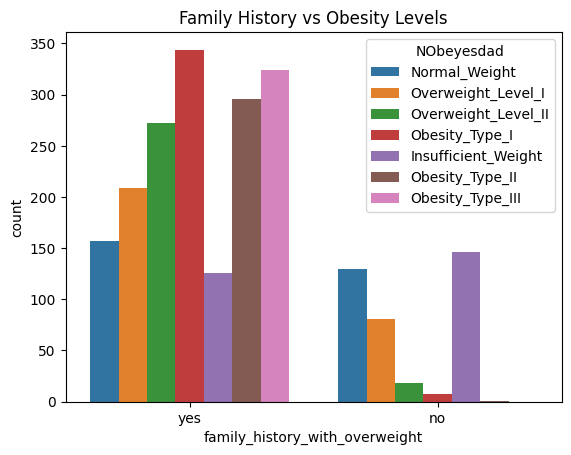

In [30]:
#family history versus obesity levels
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=data)
plt.title('Family History vs Obesity Levels')

In [33]:
pd.crosstab(data['family_history_with_overweight'], data['NObeyesdad'])

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
family_history_with_overweight,,,,,,,
no,146,130,7,1,0,81,18
yes,126,157,344,296,324,209,272




*   Individuals without a family history of overweight are in normal weight or insufficient weight categories
*   Individuals with a family history of overweight are more in obesity and overweight categories



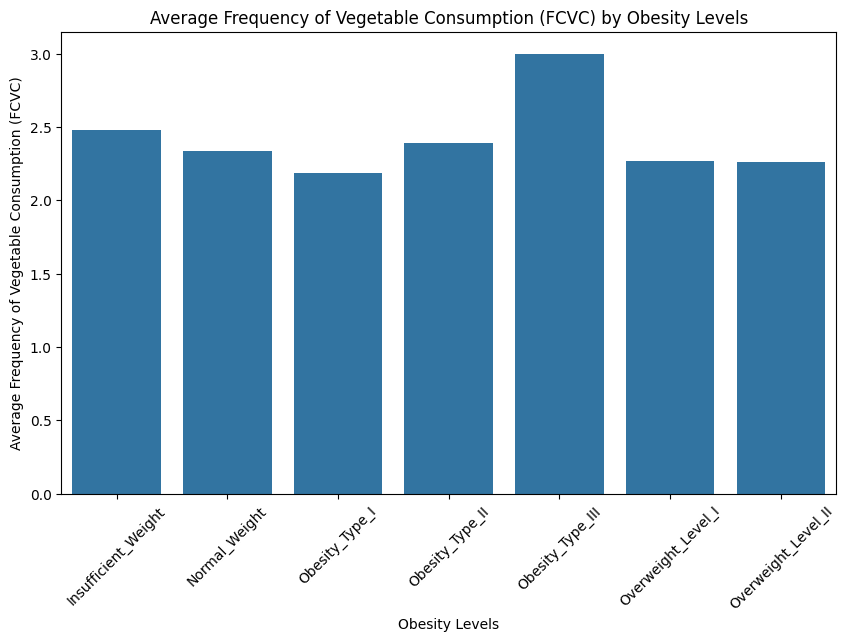

In [34]:
# Compute average FCVC for each obesity level
avg_fcvc_by_obesity = data.groupby('NObeyesdad')['FCVC'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='NObeyesdad', y='FCVC', data=avg_fcvc_by_obesity)
plt.title('Average FCVC by Obesity Levels')
plt.xlabel('Obesity Levels')
plt.ylabel('Average Frequency of Vegetable Consumption (FCVC)')
plt.xticks(rotation=45)
plt.show()




*   Obesity_Type_III has the highest mean FCVC
*   Obesity_Type_I has the lowest mean FCVC



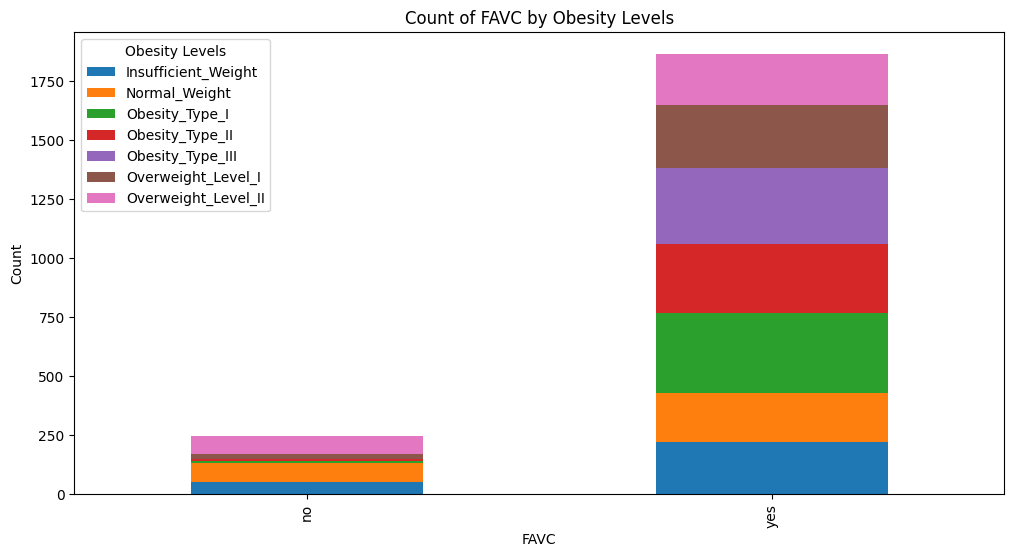

In [36]:
# Compute counts of FAVC for each obesity level
favc_by_obesity = pd.crosstab(data['FAVC'], data['NObeyesdad'])

# Plot counts of FAVC for each obesity level
favc_by_obesity.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Count of FAVC by Obesity Levels')
plt.xlabel('FAVC')
plt.ylabel('Count')
plt.legend(title='Obesity Levels')
plt.show()


In [38]:
pd.crosstab(data['FAVC'], data['NObeyesdad'])

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAVC,,,,,,,
no,51,79,11,7,1,22,74
yes,221,208,340,290,323,268,216




*   FAVC = 'yes' : Obesity_Type_II and Obesity_Type_III have the highest counts
*   FAVC = 'no'  : Obesity_Type_III has the lowest count



In [39]:
numeric_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

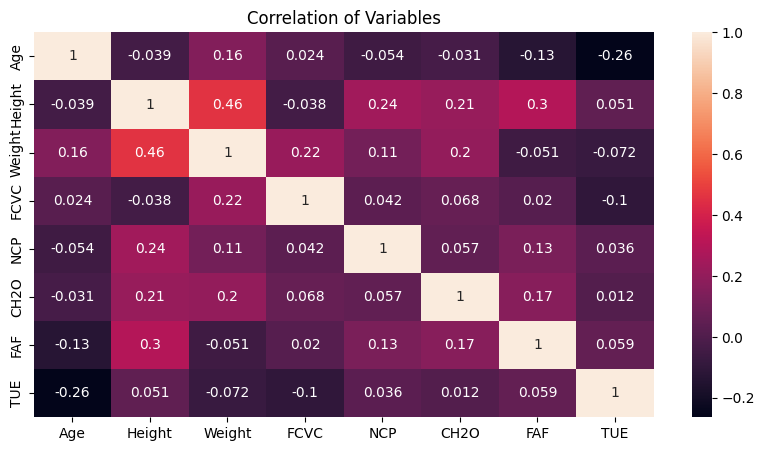

In [40]:
#correlatin matrix to find correlation between numerical features
plt.figure(figsize=(10,5))
corrmatrix=data[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].corr()
sns.heatmap(corrmatrix,annot=True)
plt.title('Correlation of Variables')
plt.show()

In [42]:
for i in cat_cols:
  print(f" {i} : {data[i].unique()}")

 Gender : ['Female' 'Male']
 family_history_with_overweight : ['yes' 'no']
 FAVC : ['no' 'yes']
 CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
 SMOKE : ['no' 'yes']
 SCC : ['no' 'yes']
 CALC : ['no' 'Sometimes' 'Frequently' 'Always']
 MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
 NObeyesdad : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [43]:
#encoding gender feature to numerical values
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1}).astype(int)

In [44]:
#change categorical labels to numerical values by map function
data['family_history_with_overweight'] = data['family_history_with_overweight'].map({'no': 0, 'yes': 1}).astype(int)
data['FAVC'] = data['FAVC'].map({'no': 0, 'yes': 1}).astype(int)
data['SMOKE'] = data['SMOKE'].map({'no': 0, 'yes': 1}).astype(int)
data['SCC'] = data['SCC'].map({'no': 0, 'yes': 1}).astype(int)

In [48]:
#one hot encoding for more than two categories in a feature
cols=['CAEC','CALC','MTRANS',]
data=pd.get_dummies(data,columns=cols,dtype='int64')

In [49]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,0,0,0,1,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,0,0,1,0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,0,1,0,0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,0,1,0,0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,0,0,1,0,0,0,0,1,0


In [50]:
# Define the mapping dictionary
obesity_mapping = {
    'Normal_Weight': 0,
    'Insufficient_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Apply the mapping to the dataset
data['NObeyesdad'] = data['NObeyesdad'].map(obesity_mapping)


In [53]:
data.dtypes

,0
Gender,int64
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,int64
FAVC,int64
FCVC,float64
NCP,float64
SMOKE,int64
CH2O,float64


In [55]:
#splitting target features and input features
x=data.drop('NObeyesdad',axis=1)
y=data['NObeyesdad']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

# SVM

In [57]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x,y)

SVC()

In [58]:
y_pred=sv.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [66]:
confusion_matrix(y_test,y_pred)

array([[21, 18, 20,  3,  0,  0,  0],
       [ 7, 49,  0,  0,  0,  0,  0],
       [14,  2, 28, 11,  1,  0,  0],
       [ 3,  0,  8, 29, 10,  0,  0],
       [ 0,  0,  0, 24, 27,  6, 21],
       [ 0,  0,  0,  0,  7, 25, 26],
       [ 0,  0,  0,  0,  0,  0, 63]])

In [74]:
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.5721040189125296


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.34      0.39        62
           1       0.71      0.88      0.78        56
           2       0.50      0.50      0.50        56
           3       0.43      0.58      0.50        50
           4       0.60      0.35      0.44        78
           5       0.81      0.43      0.56        58
           6       0.57      1.00      0.73        63

    accuracy                           0.57       423
   macro avg       0.58      0.58      0.56       423
weighted avg       0.59      0.57      0.55       423



# Decision Tree

In [75]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
y_pred=dt.predict(x_test)

In [77]:
confusion_matrix(y_test,y_pred)

array([[52,  7,  3,  0,  0,  0,  0],
       [ 4, 52,  0,  0,  0,  0,  0],
       [ 4,  0, 51,  1,  0,  0,  0],
       [ 0,  0,  3, 47,  0,  0,  0],
       [ 0,  0,  0,  2, 73,  3,  0],
       [ 0,  0,  0,  0,  3, 55,  0],
       [ 0,  0,  0,  0,  0,  0, 63]])

In [78]:
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.9290780141843972


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        62
           1       0.88      0.93      0.90        56
           2       0.89      0.91      0.90        56
           3       0.94      0.94      0.94        50
           4       0.96      0.94      0.95        78
           5       0.95      0.95      0.95        58
           6       1.00      1.00      1.00        63

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



# Random Forest

In [80]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [81]:
y_pred=dt.predict(x_test)

In [82]:
confusion_matrix(y_test,y_pred)

array([[52,  7,  3,  0,  0,  0,  0],
       [ 4, 52,  0,  0,  0,  0,  0],
       [ 4,  0, 51,  1,  0,  0,  0],
       [ 0,  0,  3, 47,  0,  0,  0],
       [ 0,  0,  0,  2, 73,  3,  0],
       [ 0,  0,  0,  0,  3, 55,  0],
       [ 0,  0,  0,  0,  0,  0, 63]])

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        62
           1       0.88      0.93      0.90        56
           2       0.89      0.91      0.90        56
           3       0.94      0.94      0.94        50
           4       0.96      0.94      0.95        78
           5       0.95      0.95      0.95        58
           6       1.00      1.00      1.00        63

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [86]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [87]:
y_pred=gbc.predict(x_test)

In [88]:
confusion_matrix(y_test,y_pred)

array([[53,  4,  5,  0,  0,  0,  0],
       [ 3, 53,  0,  0,  0,  0,  0],
       [ 3,  0, 52,  1,  0,  0,  0],
       [ 0,  0,  1, 48,  1,  0,  0],
       [ 0,  0,  2,  1, 71,  4,  0],
       [ 0,  0,  0,  0,  1, 57,  0],
       [ 0,  0,  0,  0,  0,  0, 63]])

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        62
           1       0.93      0.95      0.94        56
           2       0.87      0.93      0.90        56
           3       0.96      0.96      0.96        50
           4       0.97      0.91      0.94        78
           5       0.93      0.98      0.96        58
           6       1.00      1.00      1.00        63

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



# hist gradient boost

In [105]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Create the model
model = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=None)

# Fit the model
model.fit(x_train, y_train)

HistGradientBoostingClassifier()

In [106]:
y_pred = model.predict(x_test)

In [113]:
confusion_matrix(y_test,y_pred)

array([[54,  4,  4,  0,  0,  0,  0],
       [ 1, 55,  0,  0,  0,  0,  0],
       [ 3,  0, 53,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  1,  0, 77,  0,  0],
       [ 0,  0,  0,  0,  2, 56,  0],
       [ 0,  0,  0,  0,  0,  0, 63]])

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        62
           1       0.92      0.96      0.94        56
           2       0.90      0.95      0.92        56
           3       1.00      0.98      0.99        50
           4       0.97      0.97      0.97        78
           5       1.00      0.97      0.98        58
           6       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



In [117]:
from sklearn.model_selection import RandomizedSearchCV
model = HistGradientBoostingClassifier()

# Define the parameter grid (with a wide range of values)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],      # Step size shrinkage
    'max_iter': [100, 200, 300],                  # Number of boosting iterations
    'max_depth': [None, 3, 5, 7],                 # Maximum depth of the individual trees
    'min_samples_leaf': [10, 20, 30],             # Minimum number of samples required to be at a leaf node
    'l2_regularization': [0.0, 0.1, 0.5],         # L2 regularization to prevent overfitting
    'max_leaf_nodes': [31, 50, 100],              # Maximum number of leaves in each tree
}

In [121]:
# Set up RandomizedSearchCV with 10 iterations
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid,
                                   n_iter=5,          # Limit to 10 fits
                                   cv=5,               # 5-fold cross-validation
                                   n_jobs=-1,          # Use all available processors
                                   verbose=2,          # Print progress
                                   random_state=42)    # For reproduc

In [122]:
# Fit the model
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'l2_regularization': [0.0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [None, 3, 5, 7],
                                        'max_iter': [100, 200, 300],
                                        'max_leaf_nodes': [31, 50, 100],
                                        'min_samples_leaf': [10, 20, 30]},
                   random_state=42, verbose=2)

In [123]:
# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found after 10 fits:", best_params)

Best parameters found after 10 fits: {'min_samples_leaf': 10, 'max_leaf_nodes': 100, 'max_iter': 200, 'max_depth': None, 'learning_rate': 0.1, 'l2_regularization': 0.5}


In [125]:
# Use the best model to make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

In [126]:
# Evaluate the tuned model
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        62
           1       0.95      0.96      0.96        56
           2       0.91      0.95      0.93        56
           3       0.98      1.00      0.99        50
           4       0.97      0.95      0.96        78
           5       0.97      0.97      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

Confusion Matrix:
 [[56  3  3  0  0  0  0]
 [ 2 54  0  0  0  0  0]
 [ 2  0 53  1  0  0  0]
 [ 0  0  0 50  0  0  0]
 [ 0  0  2  0 74  2  0]
 [ 0  0  0  0  2 56  0]
 [ 0  0  0  0  0  0 63]]
